In [8]:
import os
import sys
import csv
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# 220916 issues
1. 在percolation threshold附近，相較於其他$\delta$值，(71)(72)收斂的特別緩慢？是那一個copy特別難以收斂？還是所有copy都很難收斂？

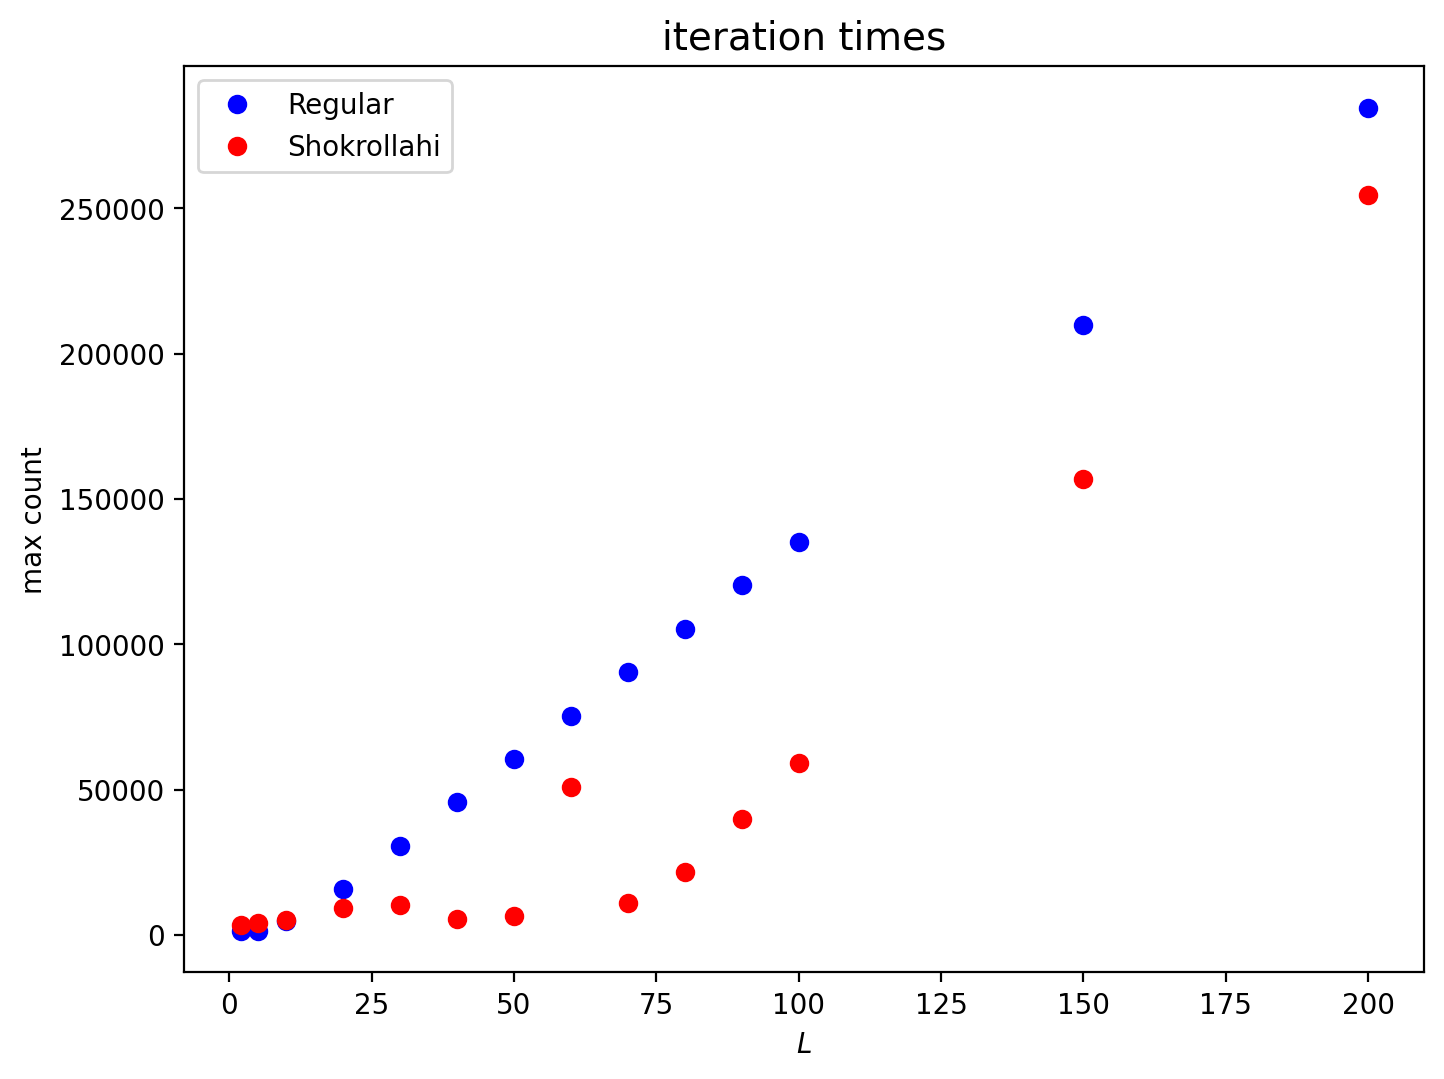

In [7]:
L_range = [2,5,10,20,30,40,50,60,70,80,90,100,150,200]
reg_pick = [1282,1451,4807,15750,30688,45626,60564,75502,90440,105378,120316,135254,209944,284634]
sho_pick = [3268,3981,4987,9368,10305,5591,6453,51048,11063,21725,39914,59327,156876,254429] #59個copy是11553 61是15918
fig = plt.figure(figsize=(8,6), dpi=200)
plt.title('iteration times', fontsize = 14) # 標題
plt.xlabel(r'$L$') # x軸標題
plt.ylabel("max count") # y軸標題
plt.plot(L_range , reg_pick, 'bo', label='Regular')
plt.legend()
plt.plot(L_range , sho_pick, 'ro', label='Shokrollahi')
plt.legend()
plt.show()

In [9]:
d = 3
G = 2 # (3,6) LDPC code
eta = 0.5
L = 59 # number of copies
ITER_TIMES = 50000*L

In [10]:
def rho(z):
    #return np.power(z,G*d-1)
    return 0.63407*np.power(z,7)+0.36593*np.power(z,8)
    
def lambda_(z):
    #return np.power(z,d-1)
    return 0.26328*z+0.18020*np.power(z,2)+0.27000*np.power(z,6)+0.28649*np.power(z,29)

In [28]:
alpha_lines = [] # 共1000個點
beta_lines = [] # 共1000個點
iter_L = []

In [29]:
for delta in [0.4969]:
    alpha_d_i = [[delta] * (L-1)] # 每一點initial condition
    beta_d_i = [[0] * L] # beta的initial condition沒差
    for i in range(1,ITER_TIMES): # 每一點迭代1000次
        beta_d_i_c = []
        for c in range(0, L): # beta共L條線, paper上的下標1代表此處的index c=0
            if (c==0):
                b = 1 - rho(1 - (1 - eta) * alpha_d_i[i-1][0])
            elif (c==L-1):
                b = 1 - rho(1 - eta * alpha_d_i[i-1][L-2])
            else:
                b = 1 - rho(1 - (1-eta) * alpha_d_i[i-1][c] - eta * alpha_d_i[i-1][c-1])
            beta_d_i_c.append(b)
            
        beta_d_i.append(beta_d_i_c)
        
        alpha_d_i_v = []
        for v in range(0, L-1): # alpha共L-1條線, paper上的下標1代表此處的index v=0
            a = delta * lambda_((1-eta) * beta_d_i[i][v] + eta * beta_d_i[i][v+1])
            alpha_d_i_v.append(a)
            
        diff_a = []
        for x,y in zip(alpha_d_i[-1], alpha_d_i_v):
            diff_a.append(abs(x-y))
        if (all(d <= 1e-8 for d in diff_a)):
            break
    
        alpha_d_i.append(alpha_d_i_v)
    iter_L.append(i)
    alpha_lines.append(alpha_d_i)
    beta_lines.append(beta_d_i)

In [30]:
alpha_lines[0] = np.array(alpha_lines[0]).transpose()

In [31]:
len(alpha_lines[0][2])

11553

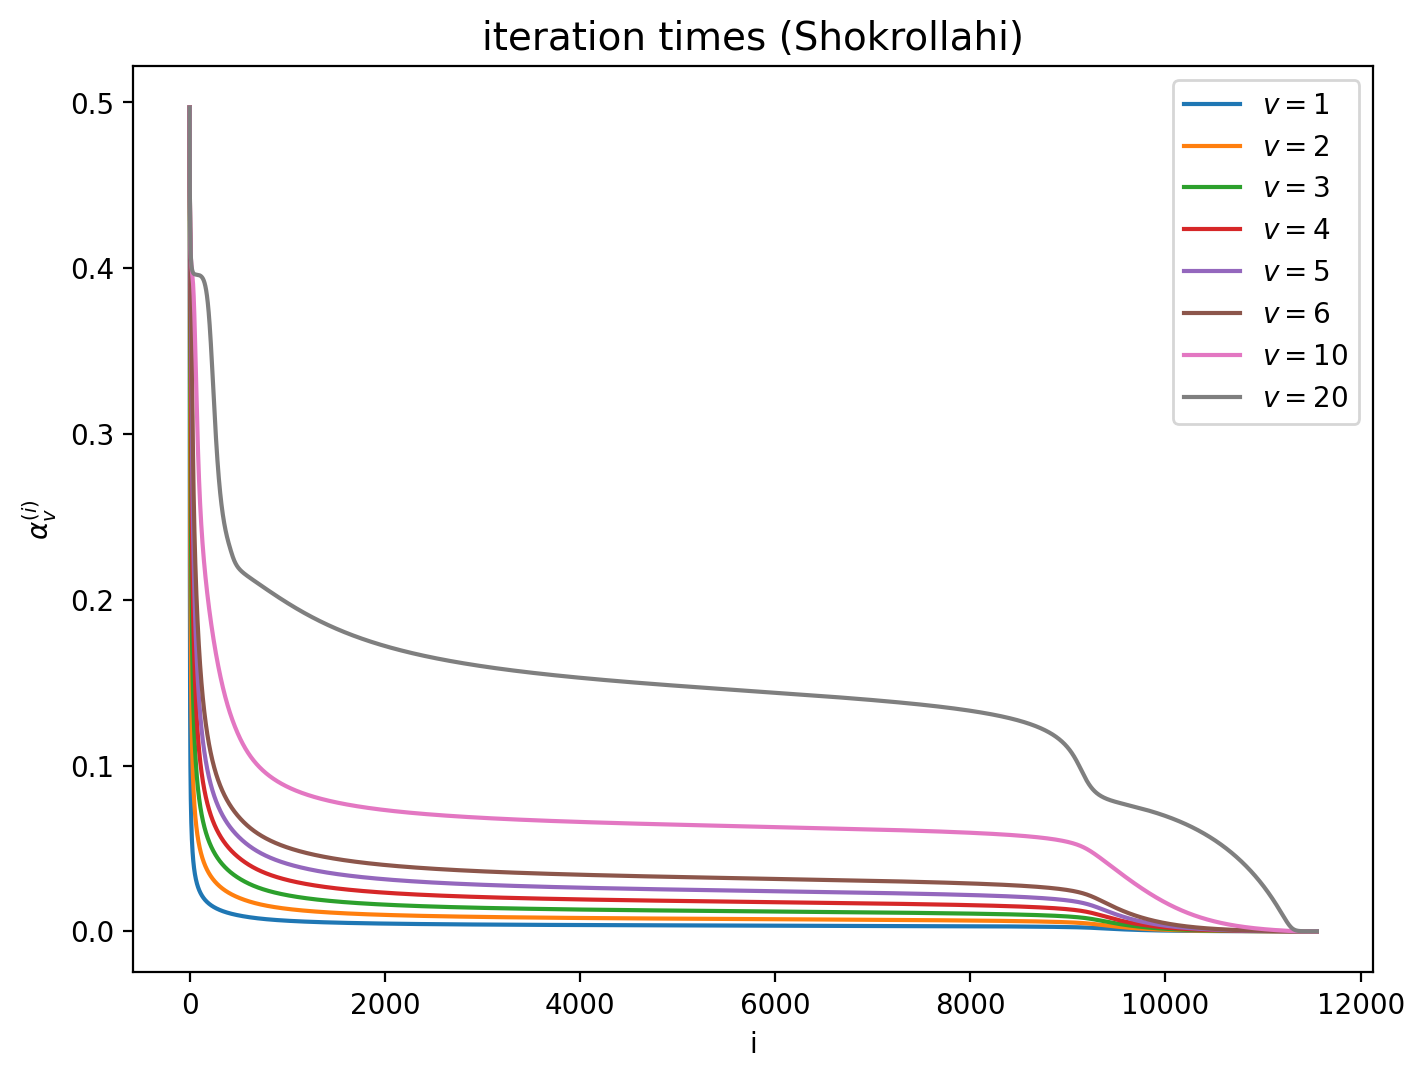

In [32]:
fig = plt.figure(figsize=(8,6), dpi=200)
colormap = plt.cm.gist_ncar # 顏色輪流出現
plt.title('iteration times (Shokrollahi)', fontsize = 14) # 標題
plt.xlabel(r'i') # x軸標題
plt.ylabel(r'$\alpha_v^{(i)}$') # y軸標題
lines = []
for i in [0,1,2,3,4,5,9,19]:#[0,7,15,23,31,38]:
    line = plt.plot(range(0,len(alpha_lines[0][2])), alpha_lines[0][i], '-')
    lines.append(r'$v=$' + str(i+1))
plt.legend(lines)
plt.show()

In [33]:
alpha_lines[0][19][5000:6000]

array([0.14807418, 0.14806983, 0.14806548, 0.14806114, 0.14805679,
       0.14805245, 0.14804811, 0.14804376, 0.14803942, 0.14803508,
       0.14803074, 0.1480264 , 0.14802206, 0.14801772, 0.14801338,
       0.14800905, 0.14800471, 0.14800038, 0.14799604, 0.14799171,
       0.14798737, 0.14798304, 0.14797871, 0.14797437, 0.14797004,
       0.14796571, 0.14796138, 0.14795705, 0.14795272, 0.14794839,
       0.14794407, 0.14793974, 0.14793541, 0.14793109, 0.14792676,
       0.14792244, 0.14791812, 0.14791379, 0.14790947, 0.14790515,
       0.14790083, 0.14789651, 0.14789219, 0.14788787, 0.14788355,
       0.14787923, 0.14787491, 0.1478706 , 0.14786628, 0.14786196,
       0.14785765, 0.14785334, 0.14784902, 0.14784471, 0.1478404 ,
       0.14783608, 0.14783177, 0.14782746, 0.14782315, 0.14781884,
       0.14781453, 0.14781023, 0.14780592, 0.14780161, 0.14779731,
       0.147793  , 0.14778869, 0.14778439, 0.14778009, 0.14777578,
       0.14777148, 0.14776718, 0.14776288, 0.14775858, 0.14775

$L=59$

In [34]:
0.1469008-0.1468966

4.2000000000097515e-06

$L=60$

In [17]:
0.13918288-0.13918265

2.3000000001771603e-07

調查max_iteration隨$L$變化的情形

In [16]:
max_iter = []
for L in tqdm(np.arange(100,130,1)):
    alpha_lines = [] # 共1000個點
    beta_lines = [] # 共1000個點
    iter_L = []
    for delta in [0.4969]:
        alpha_d_i = [[delta] * (L-1)] # 每一點initial condition
        beta_d_i = [[0] * L] # beta的initial condition沒差
        for i in range(1,ITER_TIMES): # 每一點迭代1000次
            beta_d_i_c = []
            for c in range(0, L): # beta共L條線, paper上的下標1代表此處的index c=0
                if (c==0):
                    b = 1 - rho(1 - (1 - eta) * alpha_d_i[i-1][0])
                elif (c==L-1):
                    b = 1 - rho(1 - eta * alpha_d_i[i-1][L-2])
                else:
                    b = 1 - rho(1 - (1-eta) * alpha_d_i[i-1][c] - eta * alpha_d_i[i-1][c-1])
                beta_d_i_c.append(b)
            
            beta_d_i.append(beta_d_i_c)
        
            alpha_d_i_v = []
            for v in range(0, L-1): # alpha共L-1條線, paper上的下標1代表此處的index v=0
                a = delta * lambda_((1-eta) * beta_d_i[i][v] + eta * beta_d_i[i][v+1])
                alpha_d_i_v.append(a)
            
            diff_a = []
            for x,y in zip(alpha_d_i[-1], alpha_d_i_v):
                diff_a.append(abs(x-y))
            if (all(d <= 1e-8 for d in diff_a)):
                break
    
            alpha_d_i.append(alpha_d_i_v)
        iter_L.append(i)
        alpha_lines.append(alpha_d_i)
        beta_lines.append(beta_d_i)
    alpha_lines[0] = np.array(alpha_lines[0]).transpose()
    max_iter.append(len(alpha_lines[0][2]))

  0%|                                                    | 0/30 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [17]:
max_iter_100_130 = [9557,10369,11268,12260,13346,14527,15800,17162,18608,20131,21725, \
                    23380,25090,26846,28641,30469,32323,34199,36091,37998,39914,41839,43771, \
                    45707,47647,49590,51535,53482,55429,57378]

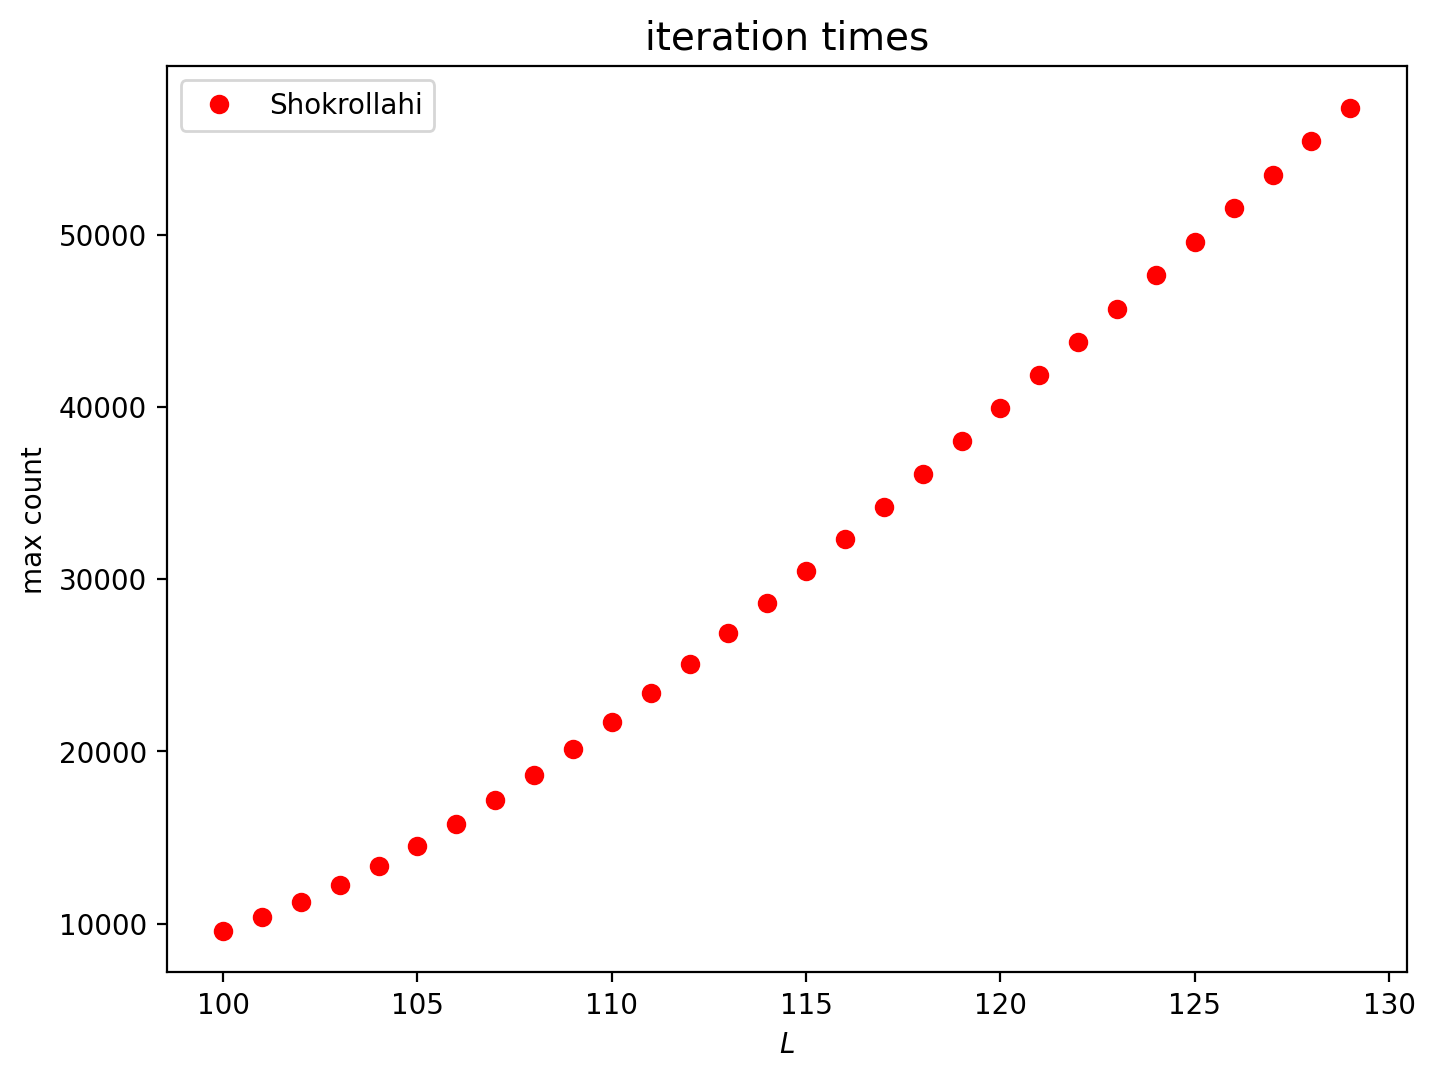

In [18]:
fig = plt.figure(figsize=(8,6), dpi=200)
plt.title('iteration times', fontsize = 14) # 標題
plt.xlabel(r'$L$') # x軸標題
plt.ylabel("max count") # y軸標題
plt.plot(np.arange(100,130,1) , max_iter_100_130, 'ro', label='Shokrollahi')
plt.legend()
plt.show()

3. 為何$L$超過一定值之後，percolation threshold的值不再改變了？這個「收斂」的速度隨著degree distribution的不同而有所不同？

In [19]:
L_range = list(range(2,201))
GL = [(x-2)/(2*x-2) for x in L_range]
L_delta = [2,5,10,20,30,40,50,60,70,80,90,100,150,200]
d = [0.8589,0.5138,0.4884,0.4881,0.4881,0.4881,0.4881,0.4881,0.4881,0.4881,0.4881,0.4881,0.4881,0.4881]

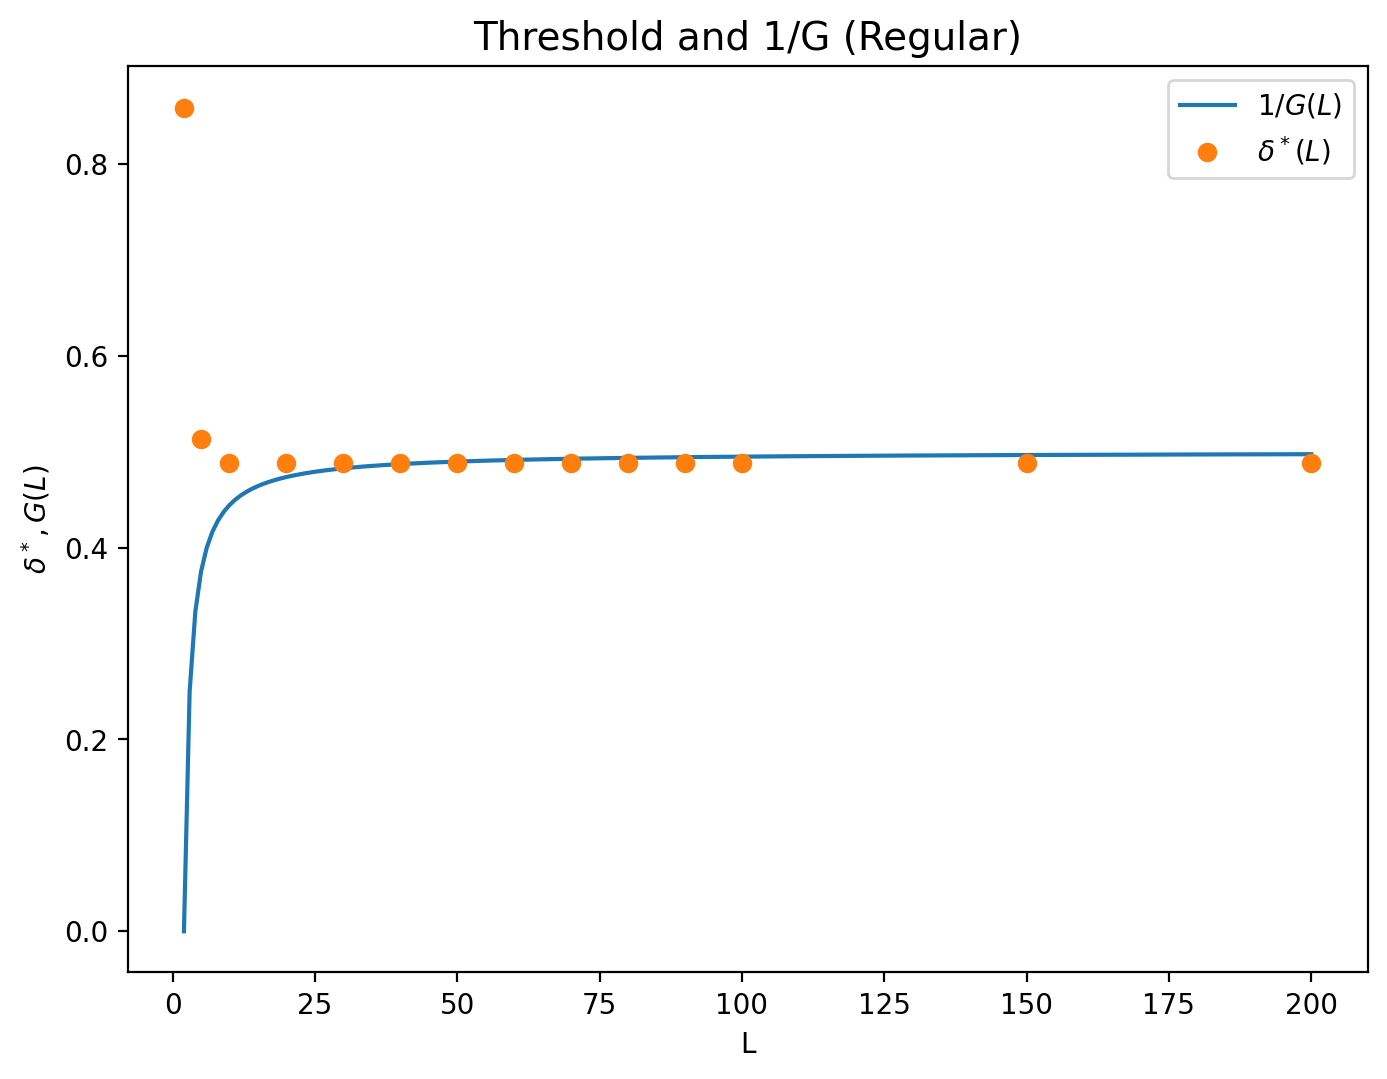

In [20]:
fig = plt.figure(figsize=(8,6), dpi=200)
colormap = plt.cm.gist_ncar # 顏色輪流出現
plt.title('Threshold and 1/G (Regular)', fontsize = 14) # 標題
plt.xlabel(r'L') # x軸標題
plt.ylabel(r'$\delta^*,G(L)$') # y軸標題
plt.plot(L_range, GL, '-', label=r'$1/G(L)$')
plt.legend()
plt.plot(L_delta, d, 'o', label=r'$\delta^*(L)$')
plt.legend()
plt.show()